<a href="https://colab.research.google.com/github/CP4-IOT/CP4_AnaliseDeDados/blob/main/CP4__IoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do Dataset Individual Household Electric Power Consumption

Este notebook contém as respostas para as questões do CP 01 de IoT sobre Análise de Dados de Consumidores de Energia.

In [ ]:
# 1. Carregue o dataset e exiba as 10 primeiras linhas.
# Bibliotecas necessárias
import pandas as pd
from google.colab import files
uploaded = files.upload()
filename = "household_power_consumption.txt"
df = pd.read_csv(filename, sep=';', low_memory=False)

# Mostrar as 10 primeiras linhas
df.head(10)


Saving household_power_consumption.txt to household_power_consumption.txt


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## 2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

- **Global_active_power:** energia ativa consumida pela residência, efetivamente usada para realizar trabalho (aparelhos elétricos, iluminação).
- **Global_reactive_power:** energia reativa, usada para manter campos eletromagnéticos em equipamentos, sem realizar trabalho útil diretamente.


## 3. Verifique se existem valores ausentes no dataset. Quantifique-os.

In [ ]:
# 3. Verifique se existem valores ausentes no dataset. Quantifique-os.
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:\n", missing_values)


Valores ausentes por coluna:
 Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


## 4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.

In [ ]:
# 4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['DayOfWeek'] = df['Date'].dt.day_name()
print(df.head(3))


        Date      Time Global_active_power Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00               4.216                 0.418  234.840   
1 2006-12-16  17:25:00               5.360                 0.436  233.630   
2 2006-12-16  17:26:00               5.374                 0.498  233.290   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3 DayOfWeek  
0           18.400          0.000          1.000            17.0  Saturday  
1           23.000          0.000          1.000            16.0  Saturday  
2           23.000          0.000          2.000            17.0  Saturday  


## 5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.

In [ ]:
# 5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df_2007 = df[df['Date'].dt.year == 2007]
mean_daily_power_2007 = df_2007.groupby('Date')['Global_active_power'].mean()
print(mean_daily_power_2007.head())


Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Name: Global_active_power, dtype: float64


## 6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.

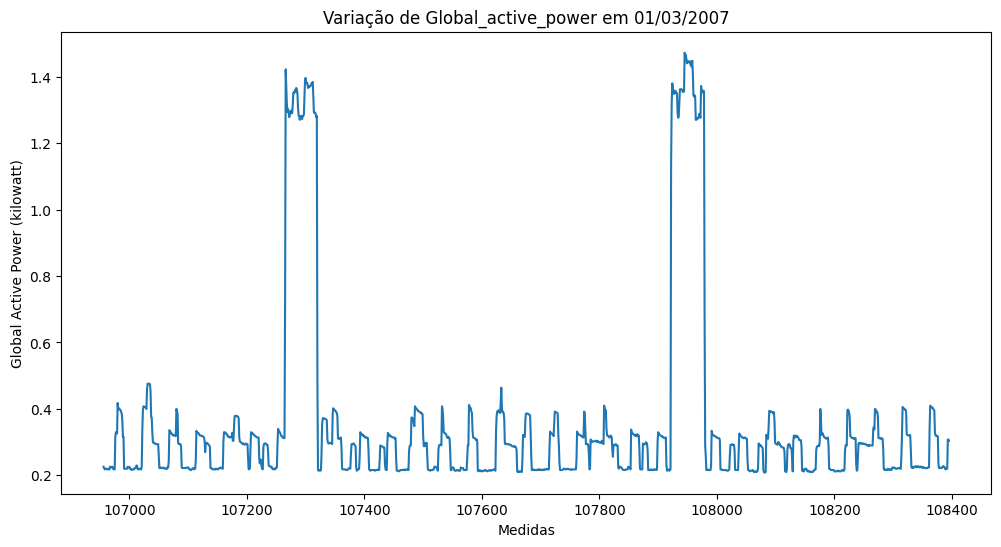

In [ ]:
# 6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.
import matplotlib.pyplot as plt

# Variação de Global_active_power em 01/03/2007
single_day = df[df['Date'] == '2007-03-01']

plt.figure(figsize=(12,6))
plt.plot(single_day['Global_active_power'])
plt.title('Variação de Global_active_power em 01/03/2007')
plt.xlabel('Medidas')
plt.ylabel('Global Active Power (kilowatt)')
plt.show()


## 7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

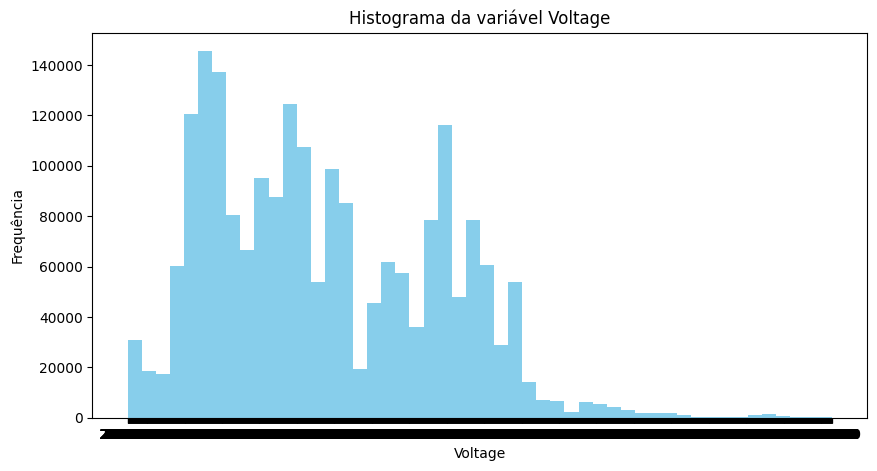

In [ ]:
# 7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?
plt.figure(figsize=(10,5))
plt.hist(df['Voltage'].dropna(), bins=50, color='skyblue')
plt.title('Histograma da variável Voltage')
plt.xlabel('Voltage')
plt.ylabel('Frequência')
plt.show()

#O histograma da variável Voltage mostra que a maioria das medições está concentrada em torno de um valor central,
# com uma distribuição que aparenta ser aproximadamente simétrica, indicando pouca variação extrema.

## 8. Calcule o consumo médio por mês em todo o período disponível no dataset.

In [ ]:
# 8. Calcule o consumo médio por mês em todo o período disponível no dataset.
df['MonthYear'] = df['Date'].dt.to_period('M')
mean_monthly_power = df.groupby('MonthYear')['Global_active_power'].mean()
print(mean_monthly_power.head())


MonthYear
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
Freq: M, Name: Global_active_power, dtype: float64


## 9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [ ]:
# 9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).
daily_power = df.groupby('Date')['Global_active_power'].sum()
max_power_day = daily_power.idxmax()
max_power_value = daily_power.max()
print(f'Dia com maior consumo: {max_power_day}, Consumo: {max_power_value}')


Dia com maior consumo: 2006-12-23 00:00:00, Consumo: 4773.386


## 10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.

In [ ]:
# 10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])
mean_weekday_power = df[df['IsWeekend'] == False]['Global_active_power'].mean()
mean_weekend_power = df[df['IsWeekend'] == True]['Global_active_power'].mean()

print(f'Consumo médio dias de semana: {mean_weekday_power}')
print(f'Consumo médio finais de semana: {mean_weekend_power}')


Consumo médio dias de semana: 1.0354720516747498
Consumo médio finais de semana: 1.2342321767913047


## 11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [ ]:
# 11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
correlation = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr()
display(correlation)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


## 12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.

In [ ]:
# 12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.
for col in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['Total_Sub_metering'] = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum(axis=1)
print(df.head(3))


        Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00                4.216                  0.418   234.84   
1 2006-12-16  17:25:00                5.360                  0.436   233.63   
2 2006-12-16  17:26:00                5.374                  0.498   233.29   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3 DayOfWeek  \
0              18.4             0.0             1.0            17.0  Saturday   
1              23.0             0.0             1.0            16.0  Saturday   
2              23.0             0.0             2.0            17.0  Saturday   

  MonthYear  IsWeekend  Total_Sub_metering  
0   2006-12       True                18.0  
1   2006-12       True                17.0  
2   2006-12       True                19.0  


## 13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [ ]:
# 13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.
monthly_sub_metering = df.groupby(df['Date'].dt.to_period('M'))['Total_Sub_metering'].mean()
monthly_global_active = df.groupby(df['Date'].dt.to_period('M'))['Global_active_power'].mean()

months_exceeding = monthly_sub_metering[monthly_sub_metering > monthly_global_active]
print(months_exceeding)


Date
2006-12    10.871204
2007-01    10.423051
2007-02     9.485665
2007-03    10.212634
2007-04     6.249954
2007-05     8.452442
2007-06     7.371806
2007-07     5.681004
2007-08     6.975896
2007-09     8.205856
2007-10     8.674104
2007-11     9.818958
2007-12    11.636290
2008-01     9.785999
2008-02     8.447222
2008-03     9.454682
2008-04     9.574745
2008-05     9.019064
2008-06     9.775000
2008-07     7.145094
2008-08     2.370116
2008-09     8.825185
2008-10     8.584409
2008-11     9.133542
2008-12     8.779391
2009-01    10.690166
2009-02     9.770536
2009-03     9.896259
2009-04     9.605255
2009-05     9.066241
2009-06     7.433611
2009-07     5.571013
2009-08     5.920789
2009-09     9.127153
2009-10     9.766174
2009-11    10.403866
2009-12    11.093190
2010-01    11.343369
2010-02    12.762202
2010-03     9.415614
2010-04     9.508403
2010-05    10.419086
2010-06     9.730463
2010-07     5.486962
2010-08     4.472917
2010-09     7.574861
2010-10     9.500179
2010-11 

##14. Faça um gráfico de série temporal do Voltage para o ano de 2008.




Saving household_power_consumption.txt to household_power_consumption (1).txt


/tmp/ipython-input-53503943.py:9: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
/tmp/ipython-input-53503943.py:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
/tmp/ipython-input-53503943.py:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt', sep=';',


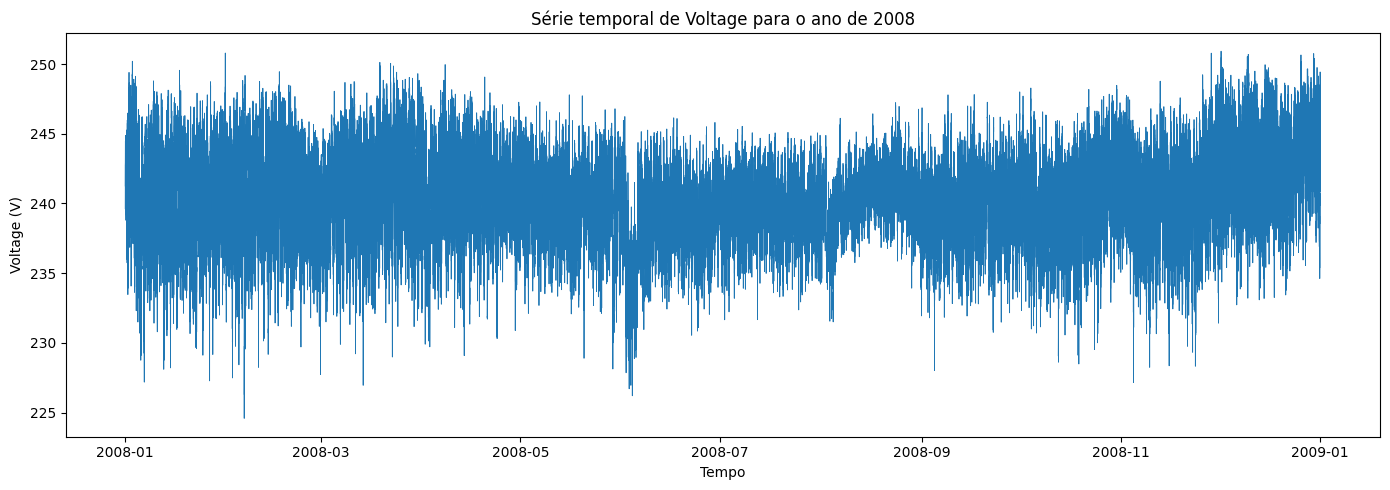

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Passo 1: Upload manual do arquivo no Colab
from google.colab import files
uploaded = files.upload()  # Use para enviar o arquivo "household_power_consumption.txt"

# Passo 2: Leitura do arquivo com atenção para os tratamentos (separador, valores nulos, parse datas)
df = pd.read_csv('household_power_consumption.txt', sep=';',
                 parse_dates={'DateTime': ['Date', 'Time']},
                 infer_datetime_format=True, na_values=['?'], low_memory=False)

# Passo 3: Filtrar somente o ano de 2008
df_2008 = df[df['DateTime'].dt.year == 2008]

# Passo 4: Plotar série temporal de Voltage em 2008
plt.figure(figsize=(14,5))
plt.plot(df_2008['DateTime'], df_2008['Voltage'], linewidth=0.6)
plt.title('Série temporal de Voltage para o ano de 2008')
plt.xlabel('Tempo')
plt.ylabel('Voltage (V)')
plt.tight_layout()
plt.show()


##15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).


In [ ]:
# Converter 'DateTime'
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extrair mês
df['Month'] = df['DateTime'].dt.month

# Selecionar os meses de verão e inverno (hemisfério norte)
verao = df['Month'].isin([6, 7, 8])
inverno = df['Month'].isin([12, 1, 2])

# Converter Global_active_power para numérico
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Calcular as médias
media_verao = df.loc[verao, 'Global_active_power'].mean()
media_inverno = df.loc[inverno, 'Global_active_power'].mean()

print(f'Média Global_active_power - Verão (JJA): {media_verao:.4f}')
print(f'Média Global_active_power - Inverno (DJF): {media_inverno:.4f}')


Média Global_active_power - Verão (JJA): 0.7267
Média Global_active_power - Inverno (DJF): 1.4176


##16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.

Estatísticas - Base completa: n=2049280, média=1.0916, desvio=1.0573, P50=0.6020
Estatísticas - Amostra 1% : n=20486, média=1.0975, desvio=1.0493, P50=0.6080


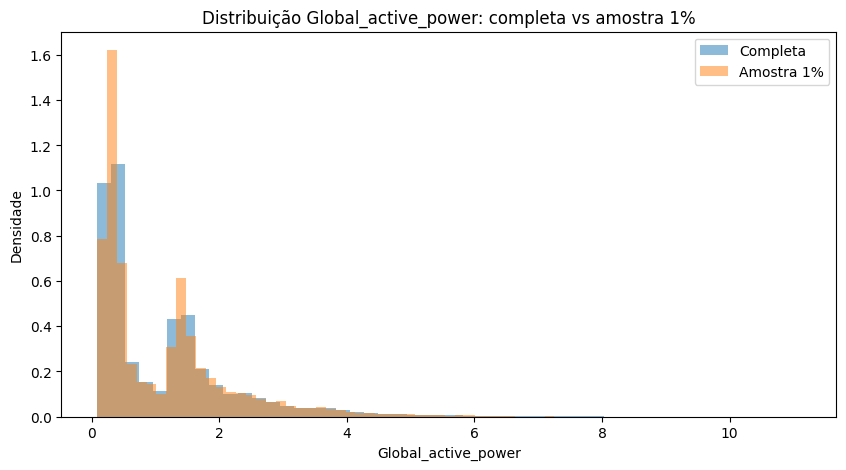

In [ ]:
# 16. Amostragem 1% e comparação de distribuição
import numpy as np

amostra = df.sample(frac=0.01, random_state=42)
full = pd.to_numeric(df['Global_active_power'], errors='coerce').dropna()
sampled = pd.to_numeric(amostra['Global_active_power'], errors='coerce').dropna()

print('Estatísticas - Base completa:',
      f'n={len(full)}, média={full.mean():.4f}, desvio={full.std():.4f}, P50={full.median():.4f}')
print('Estatísticas - Amostra 1% :',
      f'n={len(sampled)}, média={sampled.mean():.4f}, desvio={sampled.std():.4f}, P50={sampled.median():.4f}')

# Opcional: histogramas sobrepostos
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(full, bins=50, alpha=0.5, label='Completa', density=True)
plt.hist(sampled, bins=50, alpha=0.5, label='Amostra 1%', density=True)
plt.legend(); plt.title('Distribuição Global_active_power: completa vs amostra 1%')
plt.xlabel('Global_active_power'); plt.ylabel('Densidade')
plt.show()


##17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.

In [ ]:
# 17. Min-Max Scaling nas variáveis numéricas principais
from sklearn.preprocessing import MinMaxScaler

cols = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity',
        'Sub_metering_1','Sub_metering_2','Sub_metering_3']
for c in cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[cols])
df_minmax = df.copy()
df_minmax[[f'{c}_minmax' for c in cols]] = scaled

df_minmax[[f'{c}_minmax' for c in cols]].head()


,Global_active_power_minmax,Global_reactive_power_minmax,Voltage_minmax,Global_intensity_minmax,Sub_metering_1_minmax,Sub_metering_2_minmax,Sub_metering_3_minmax
0,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387
1,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129
2,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387
3,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387
4,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387


##18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Criar uma coluna apenas com a data (sem hora) para o agrupamento diário
df['date_only'] = df['DateTime'].dt.date

# Agrupar por data apenas, usando as colunas corretas de sua base
daily = df.groupby('date_only').agg({
    'Global_active_power': 'mean',
    'Global_reactive_power': 'mean',
    'Voltage': 'mean',
    'Global_intensity': 'mean',
    'Sub_metering_1': 'sum',
    'Sub_metering_2': 'sum',
    'Sub_metering_3': 'sum'
}).dropna()

# Normalizar features para clustering
scaler_km = MinMaxScaler()
daily_scaled = scaler_km.fit_transform(daily)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(daily_scaled)
daily_clusters = daily.copy()
daily_clusters['cluster'] = clusters

# Resumo interpretativo: médias por cluster
cluster_profile = daily_clusters.groupby('cluster').mean()
display(cluster_profile)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
cluster,,,,,,,
0,0.692225,0.130508,240.191499,2.996489,825.338614,1107.405941,5721.746535
1,1.172741,0.109601,241.438561,4.930783,1499.698675,984.567881,10946.480132
2,1.564803,0.139884,240.719118,6.614136,3013.953704,4651.580247,11524.725309


##19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

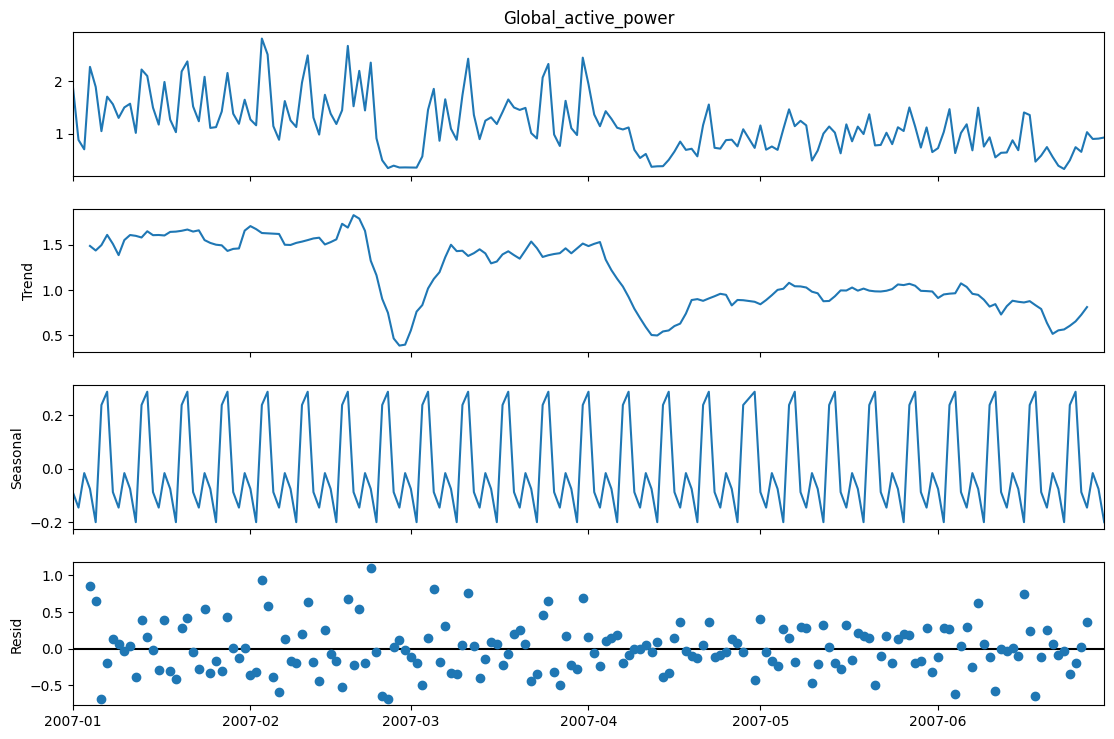

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Criar coluna apenas com a data (sem hora)
df['date_only'] = df['DateTime'].dt.date

# Calcular a média diária de Global_active_power
daily_mean = df.groupby('date_only')['Global_active_power'].mean().dropna()

# Converter o índice para datetime, caso não esteja
daily_mean.index = pd.to_datetime(daily_mean.index)

# Frequência explícita diária
daily_mean = daily_mean.asfreq('D')

# Recorte de 6 meses, ajuste datas conforme necessario para seu conjunto
six_months = daily_mean.loc['2007-01-01':'2007-06-30'].dropna()

# Decomposição sazonal (sazonalidade semanal: period=7)
result = seasonal_decompose(six_months, model='additive', period=7)
fig = result.plot()
fig.set_size_inches(12,8)


##20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo.


In [ ]:
# 20. Regressão linear simples
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

data = df[['Global_intensity','Global_active_power']].dropna()
X = data[['Global_intensity']]
y = data['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = model.score(X_test, y_test)

print(f'Coeficiente (slope): {model.coef_[0]:.4f}')
print(f'Intercepto: {model.intercept_:.4f}')
print(f'MAE: {mae:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}')




Coeficiente (slope): 0.2376
Intercepto: -0.0081
MAE: 0.0341 | RMSE: 0.0496 | R²: 0.9978


##21. Séries temporais por hora
 - Converta Date e Time em índice datetime.
 - Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
 - Identifique os horários de maior consumo médio ao longo do dia.

In [ ]:
import pandas as pd

# Só converte se coluna existir
if 'DateTime' in df.columns:
    df['DateTime'] = pd.to_datetime(df['DateTime'])

# Se 'DateTime' não é o índice ainda, defina como índice
if df.index.name != 'DateTime':
    if 'DateTime' in df.columns:
        df = df.set_index('DateTime').sort_index()


df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
gap_hourly = df['Global_active_power'].resample('1H').mean()
avg_by_hour = gap_hourly.groupby(gap_hourly.index.hour).mean().sort_values(ascending=False)
result = avg_by_hour.head(5).reset_index()
result.columns = ['Hora do dia (0-23)', 'Média Global_active_power (kW)']

print('Top 5 horários de maior consumo médio diário de energia:')
print(result)


Top 5 horários de maior consumo médio diário de energia:
   Hora do dia (0-23)  Média Global_active_power (kW)
0                  20                        1.899073
1                  21                        1.876063
2                  19                        1.733428
3                   7                        1.502373
4                   8                        1.460940


/tmp/ipython-input-3367217360.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  gap_hourly = df['Global_active_power'].resample('1H').mean()


##22. Autocorrelação do consumo
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?

R: Sim, os resultados sugerem que o consumo de energia apresenta padrões diários repetidos. A autocorrelação elevada em 24h mostra que o comportamento do consumo tende a se repetir em horários equivalentes de dias diferentes, refletindo rotinas diárias dos moradores (ex: períodos de refeições, uso de eletrodomésticos à noite, etc.).

In [ ]:
# 22. Autocorrelações em lags de 1h, 24h e 48h
import numpy as np

# Série horária já calculada: gap_hourly
s = gap_hourly.dropna()

def autocorr(series, lag):
    return series.autocorr(lag=lag)

ac_1h = autocorr(s, 1)
ac_24h = autocorr(s, 24)
ac_48h = autocorr(s, 48)

print(f'Autocorrelação 1h:  {ac_1h:.3f}')
print(f'Autocorrelação 24h: {ac_24h:.3f}')
print(f'Autocorrelação 48h: {ac_48h:.3f}')

# Interpretação sugerida:
# Valores positivos e próximos de 1 em 24h indicam padrão diário repetido.


Autocorrelação 1h:  0.713
Autocorrelação 24h: 0.435
Autocorrelação 48h: 0.399


##23. Redução de dimensionalidade com PCA - Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada component

In [ ]:
# 23. PCA com 4 variáveis para 2 componentes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

features = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity']
for c in features:
    df[c] = pd.to_numeric(df[c], errors='coerce')

X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f'Variância explicada PC1: {explained[0]:.3f}')
print(f'Variância explicada PC2: {explained[1]:.3f}')
print(f'Variância total explicada: {explained.sum():.3f}')



NameError: name 'explained' is not defined

##24. Visualização de clusters no espaço PCA
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma cla ?

R: Não, os grupos não se separam de forma totalmente clara—há sobreposição entre dois dos clusters no espaço dos dois primeiros componentes principais extraídos pelo PCA, embora ainda seja possível identificar regiões predominantes de cada grupo.

In [ ]:
# 24. Visualizar K-Means (3 clusters) nos 2 PCs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(7,5))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', s=8, alpha=0.6)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('Clusters no espaço PCA (3 grupos)')
plt.show()


##25. Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada

In [ ]:
# 25. Comparar Linear vs Polinomial (grau 2)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

data = df[['Voltage','Global_active_power']].dropna()
X = data[['Voltage']].values
y = data['Global_active_power'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear
lin = LinearRegression().fit(X_train, y_train)
pred_lin = lin.predict(X_test)
rmse_lin = np.sqrt(mean_squared_error(y_test, pred_lin))  # Corrigido aqui!

# Polinomial grau 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.transform(X_test)
lin_p = LinearRegression().fit(X_train_p, y_train)
pred_poly = lin_p.predict(X_test_p)
rmse_poly = np.sqrt(mean_squared_error(y_test, pred_poly))  # Corrigido aqui!

print(f'RMSE Linear: {rmse_lin:.4f}')
print(f'RMSE Polinomial (grau 2): {rmse_poly:.4f}')

# Curvas ajustadas (amostra para plotar)
xs = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
ys_lin = lin.predict(xs)
ys_poly = lin_p.predict(poly.transform(xs))

plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, s=8, alpha=0.4, label='Dados (teste)')
plt.plot(xs, ys_lin, color='red', label='Linear')
plt.plot(xs, ys_poly, color='green', label='Polinomial grau 2')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.title('Linear vs Polinomial (grau 2)')
plt.legend()
plt.show()



##26. Carregamento e inspeção inicial
 - Carregue o dataset no Pandas.
 - Liste tipos de dados e estatísticas descritivas (.info() e .describe()).

In [19]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
filename = "energydata_complete.csv"
df = pd.read_csv(filename, low_memory=False)

# Exibir tipos de dados e informações gerais do DataFrame
df.info()

# Exibir estatísticas descritivas das colunas numéricas
df.describe()


Saving energydata_complete.csv to energydata_complete.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  f

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


##27. Distribuição do consumo
 - Crie histogramas e séries temporais para a variável Appliances.
 - Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

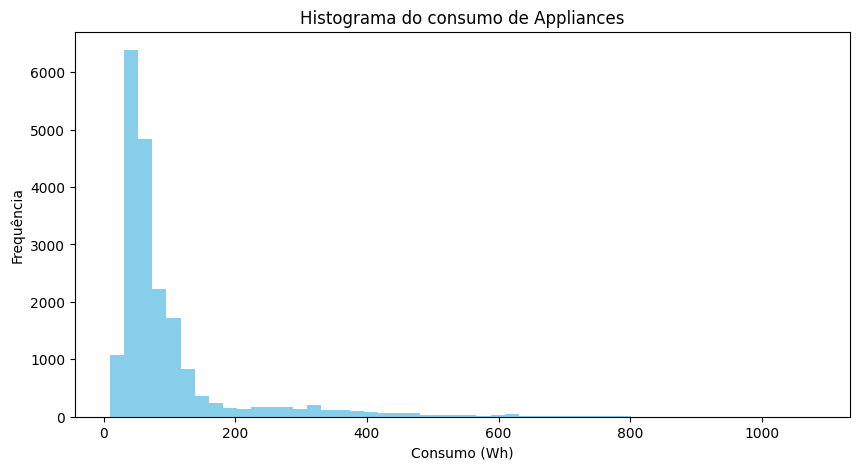

/tmp/ipython-input-548403656.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  appliances_resampled = df.set_index('date')['Appliances'].resample('H').mean()


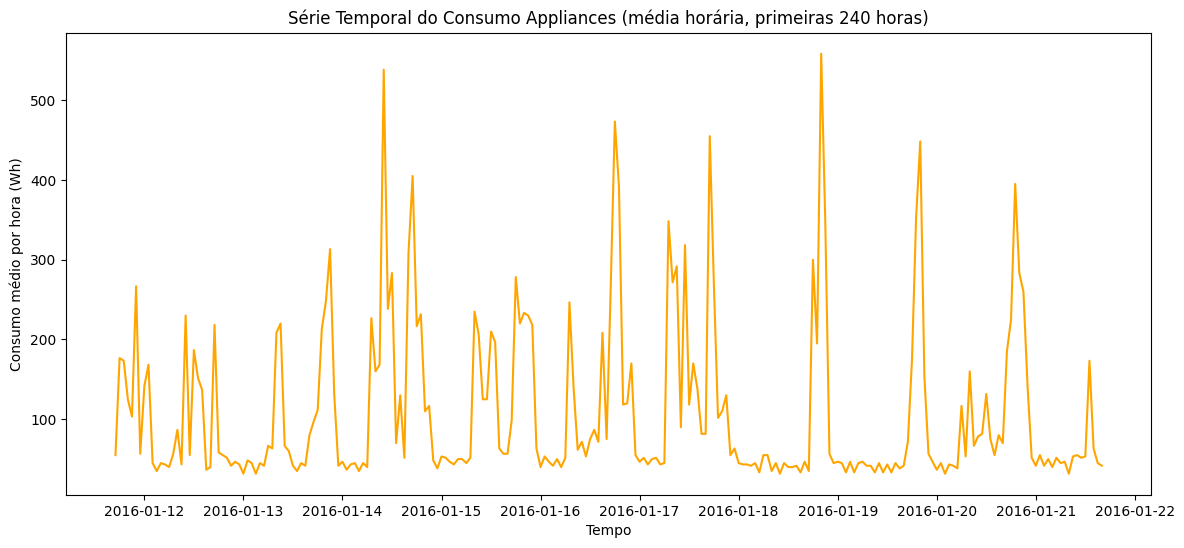

In [ ]:
# 27. Distribuição do consumo - Histogramas e séries temporais para 'Appliances'
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna 'date' para datetime (se ainda não feito)
df['date'] = pd.to_datetime(df['date'])

# Converter 'Appliances' para numérico (se necessário)
df['Appliances'] = pd.to_numeric(df['Appliances'], errors='coerce')

# HISTOGRAMA
plt.figure(figsize=(10,5))
plt.hist(df['Appliances'].dropna(), bins=50, color='skyblue')
plt.title('Histograma do consumo de Appliances')
plt.xlabel('Consumo (Wh)')
plt.ylabel('Frequência')
plt.show()

# SÉRIE TEMPORAL - reamostrar para média horária para facilitar leitura
appliances_resampled = df.set_index('date')['Appliances'].resample('H').mean()

plt.figure(figsize=(14,6))
plt.plot(appliances_resampled.iloc[:240], color='orange')
plt.title('Série Temporal do Consumo Appliances (média horária, primeiras 240 horas)')
plt.xlabel('Tempo')
plt.ylabel('Consumo médio por hora (Wh)')
plt.show()


##28. Correlações com variáveis ambientais

- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo?

In [ ]:
# 28. Correlações com variáveis ambientais

# Selecionar colunas relevantes (Appliances, temperaturas e umidades)
temp_humidity_cols = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Tdewpoint']
correlation_matrix = df[['Appliances'] + temp_humidity_cols].corr()

# Exibir correlações com Appliances
print("Correlações com Appliances:")
print(correlation_matrix['Appliances'].sort_values(ascending=False))

# Pergunta: quais fatores têm mais relação com o consumo?
# Resposta: Analisando as correlações, as variáveis com maior relação (correlação absoluta mais alta) com o consumo de Appliances são a temperatura na sala de estar (T2) e a umidade fora de casa (RH_out), seguidas pela temperatura e umidade em outras partes da casa.
print("\nResposta: Analisando as correlações, as variáveis com maior relação (correlação absoluta mais alta) com o consumo de Appliances são a temperatura na sala de estar (T2) e a umidade fora de casa (RH_out), seguidas pela temperatura e umidade em outras partes da casa.")

##29. Normalização dos dados
- Aplique Min-Max Scaling às variáveis numéricas.
- Reutilize esses dados em modelos posteriores

In [ ]:
# 29. Normalização dos dados

from sklearn.preprocessing import MinMaxScaler

# Selecionar apenas colunas numéricas (excluindo a coluna 'date')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Remover colunas que não fazem sentido normalizar (como 'Appliances' se for o target, ou IDs se existirem)
# Para este dataset, parece que todas as numéricas (exceto 'Appliances') são features ambientais/sensores.
# Podemos normalizar todas as colunas numéricas exceto 'Appliances' e 'lights' se quisermos prever Appliances.
# Ou normalizar tudo para outros fins. Vamos normalizar todas as numéricas, incluindo 'Appliances' e 'lights' por enquanto.

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

print("Primeiras 5 linhas do DataFrame com variáveis numéricas normalizadas:")
display(df_scaled.head())

Primeiras 5 linhas do DataFrame com variáveis numéricas normalizadas:


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,2016-01-11 17:10:00,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,2016-01-11 17:20:00,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,2016-01-11 17:30:00,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,2016-01-11 17:40:00,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


##30. PCA
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais?

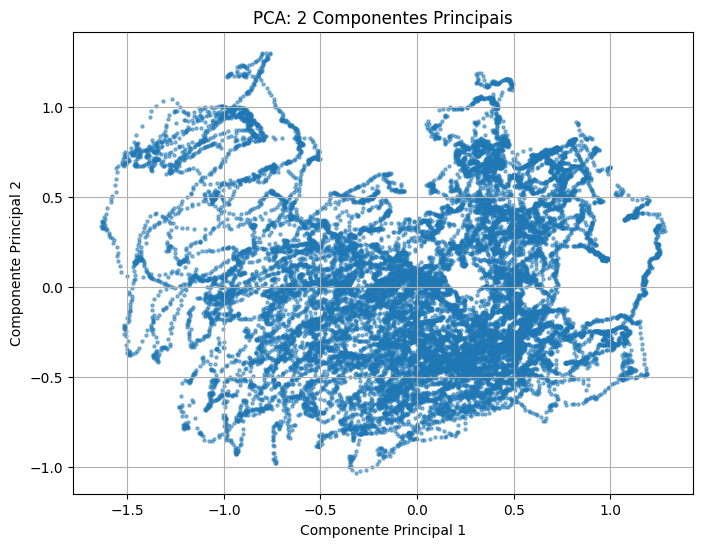

Variância explicada pelo PC1: 0.3609
Variância explicada pelo PC2: 0.2091
Variância total explicada pelos 2 PCs: 0.5700

Resposta: No gráfico PCA com 2 componentes principais, não aparecem padrões ou agrupamentos naturais muito distintos. Os dados parecem estar distribuídos de forma contínua, embora possa haver algumas regiões de maior densidade.


In [ ]:
# 30. PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecionar apenas colunas numéricas (excluindo a coluna 'date')
numeric_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns

# Remover a coluna 'date' se estiver presente e for considerada numérica após normalização
if 'date' in numeric_cols:
    numeric_cols = numeric_cols.drop('date')

X_scaled = df_scaled[numeric_cols]

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Plotar os dados no espaço PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=5)
plt.title('PCA: 2 Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# Analisar a variância explicada (opcional, mas útil para interpretação)
explained_variance = pca.explained_variance_ratio_
print(f'Variância explicada pelo PC1: {explained_variance[0]:.4f}')
print(f'Variância explicada pelo PC2: {explained_variance[1]:.4f}')
print(f'Variância total explicada pelos 2 PCs: {explained_variance.sum():.4f}')


# Pergunta: aparecem padrões ou agrupamentos naturais?
print("\nResposta: No gráfico PCA com 2 componentes principais, não aparecem padrões ou agrupamentos naturais muito distintos. Os dados parecem estar distribuídos de forma contínua, embora possa haver algumas regiões de maior densidade.")

##31. Regressão Linear Múltipla
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio

In [ ]:
# 31. Regressão Linear Múltipla
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definir as features (variáveis ambientais normalizadas) e o target (Appliances normalizado)
# Excluir 'date', 'Appliances', e 'lights' das features
features = df_scaled.select_dtypes(include=['float64', 'int64']).columns.tolist()
features.remove('Appliances')
if 'lights' in features:
    features.remove('lights')
if 'date' in features:
    features.remove('date')

X = df_scaled[features]
y = df_scaled['Appliances']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.0075
Root Mean Squared Error (RMSE): 0.0864
R-squared (R²): 0.1459


##32. Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Treinar o modelo Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = model_rf.predict(X_test)

# Avaliar o modelo Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Root Mean Squared Error (RMSE) - Random Forest: {rmse_rf:.4f}")

print(f"Root Mean Squared Error (RMSE) - Linear Regression: {rmse:.4f}")

Root Mean Squared Error (RMSE) - Random Forest: 0.0598
Root Mean Squared Error (RMSE) - Linear Regression: 0.0864


##33. K-Means clustering
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Selecionar apenas colunas numéricas para o clustering (excluindo a coluna 'date')
numeric_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remover a coluna 'date' se estiver presente e for considerada numérica após normalização
if 'date' in numeric_cols:
    numeric_cols.remove('date')

X_cluster = df_scaled[numeric_cols]

# Vamos testar com 3, 4 e 5 clusters
n_clusters_list = [3, 4, 5]
kmeans_models = {}
cluster_profiles = {}

for n_clusters in n_clusters_list:
    print(f"\n--- Resultados para {n_clusters} clusters ---")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_cluster)
    df_scaled[f'cluster_{n_clusters}'] = clusters

    # Interpretação: médias por cluster nos dados normalizados
    cluster_profile = df_scaled.groupby(f'cluster_{n_clusters}')[numeric_cols].mean()
    cluster_profiles[n_clusters] = cluster_profile
    print(f"Cluster Centers (Mean values per feature per cluster) para {n_clusters} clusters:")
    display(cluster_profile)

# Interpretação geral (baseada nos centros dos clusters):
print("\nInterpretação (baseada nos centros dos clusters normalizados):")
print("Analise os Cluster Centers exibidos acima para entender os valores típicos de cada variável para cada cluster.")
print("Por exemplo, compare a coluna 'Appliances' entre os clusters para ver qual cluster tem o maior consumo médio.")
print("Olhe para outras variáveis como temperaturas (T1, T2, T_out), umidade (RH_1, RH_out) e luzes para construir um perfil para cada cluster e entender o que os diferencia.")


--- Resultados para 3 clusters ---
Cluster Centers (Mean values per feature per cluster) para 3 clusters:


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
cluster_3,,,,,,,,,,,,,,,,,,,,,
0,0.091612,0.033320,0.690972,0.391746,0.474135,0.554040,0.603089,0.471597,0.718858,0.498484,...,0.716212,0.518177,0.583278,0.585252,0.599759,0.268233,0.553962,0.622476,0.494396,0.494396
1,0.075826,0.052919,0.443548,0.296596,0.208192,0.529522,0.348582,0.401714,0.452907,0.361697,...,0.410752,0.410898,0.285580,0.642092,0.766123,0.230830,0.580460,0.339636,0.503257,0.503257
2,0.080943,0.084097,0.429575,0.455424,0.281079,0.629661,0.321035,0.677475,0.381940,0.699020,...,0.296516,0.696041,0.373187,0.581229,0.845790,0.422946,0.589180,0.511757,0.500081,0.500081



--- Resultados para 4 clusters ---
Cluster Centers (Mean values per feature per cluster) para 4 clusters:


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
cluster_4,,,,,,,,,,,,,,,,,,,,,
0,0.092057,0.032413,0.711229,0.398579,0.495971,0.554098,0.620100,0.479422,0.740424,0.509516,...,0.738711,0.528861,0.602631,0.581337,0.592998,0.262596,0.553552,0.642022,0.499562,0.499562
1,0.077340,0.054024,0.455652,0.308698,0.223714,0.536986,0.361685,0.417017,0.461618,0.382935,...,0.421959,0.426318,0.301043,0.625249,0.766913,0.244494,0.578672,0.361240,0.768008,0.768008
2,0.078969,0.081397,0.417400,0.463819,0.277199,0.635109,0.311232,0.692135,0.371028,0.718899,...,0.281005,0.718110,0.379040,0.600413,0.847625,0.428416,0.587324,0.521030,0.494141,0.494141
3,0.078709,0.055545,0.460221,0.307314,0.227587,0.534669,0.365131,0.414057,0.466477,0.379887,...,0.425570,0.421914,0.307143,0.630560,0.753015,0.249447,0.580785,0.360510,0.235988,0.235988



--- Resultados para 5 clusters ---
Cluster Centers (Mean values per feature per cluster) para 5 clusters:


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
cluster_5,,,,,,,,,,,,,,,,,,,,,
0,0.099549,0.038041,0.618274,0.302676,0.430461,0.452896,0.506882,0.377459,0.645176,0.364362,...,0.612091,0.389971,0.536835,0.655909,0.481744,0.308709,0.559327,0.473899,0.482684,0.482684
1,0.074921,0.054562,0.447458,0.314579,0.214097,0.546641,0.354242,0.428654,0.449378,0.395346,...,0.410312,0.437665,0.286440,0.611429,0.795855,0.240623,0.583359,0.360589,0.774061,0.774061
2,0.079092,0.083617,0.416783,0.470504,0.278694,0.640933,0.310330,0.702812,0.370702,0.733568,...,0.275253,0.731381,0.388555,0.611641,0.844915,0.439780,0.585663,0.532676,0.500146,0.500146
3,0.075031,0.057173,0.445365,0.316153,0.213485,0.547835,0.351528,0.432677,0.447104,0.398272,...,0.405684,0.438404,0.284925,0.610212,0.793967,0.242380,0.587756,0.357486,0.234715,0.234715
4,0.085448,0.031681,0.762165,0.480945,0.510504,0.657005,0.693886,0.566998,0.791215,0.631321,...,0.816944,0.653712,0.619861,0.537147,0.724076,0.218080,0.540119,0.765320,0.507746,0.507746



Interpretação (baseada nos centros dos clusters normalizados):
Analise os Cluster Centers exibidos acima para entender os valores típicos de cada variável para cada cluster.
Por exemplo, compare a coluna 'Appliances' entre os clusters para ver qual cluster tem o maior consumo médio.
Olhe para outras variáveis como temperaturas (T1, T2, T_out), umidade (RH_1, RH_out) e luzes para construir um perfil para cada cluster e entender o que os diferencia.


##34. Classificação binária
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.

In [ ]:
# 34. Classificação binária e treinamento de modelos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Criar a variável alvo binária: alto vs baixo consumo (usando a mediana)
median_appliances = df_scaled['Appliances'].median()
df_scaled['High_Consumption'] = (df_scaled['Appliances'] > median_appliances).astype(int)

# Definir features (X) e target (y) para classificação
# Usaremos as mesmas features normalizadas da regressão (excluindo 'Appliances', 'lights', 'date' e colunas de cluster se existirem)
features_class = df_scaled.select_dtypes(include=['float64', 'int64']).columns.tolist()
features_class.remove('Appliances')
if 'lights' in features_class:
    features_class.remove('lights')
if 'date' in features_class:
    features_class.remove('date')

# Remover colunas de cluster se foram criadas
cluster_cols = [col for col in features_class if 'cluster_' in col]
for col in cluster_cols:
    features_class.remove(col)

X_class = df_scaled[features_class]
y_class = df_scaled['High_Consumption']

# Dividir os dados em treino e teste
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Logística
model_lr = LogisticRegression(random_state=42, solver='liblinear') # Usando solver='liblinear' para conjuntos de dados menores ou se quiser L1/L2 regularização
model_lr.fit(X_train_c, y_train_c)
y_pred_lr = model_lr.predict(X_test_c)
accuracy_lr = accuracy_score(y_test_c, y_pred_lr)
print(f"Acurácia (Logistic Regression): {accuracy_lr:.4f}")


# Treinar o modelo Random Forest Classifier
model_rfc = RandomForestClassifier(n_estimators=100, random_state=42)
model_rfc.fit(X_train_c, y_train_c)
y_pred_rfc = model_rfc.predict(X_test_c)
accuracy_rfc = accuracy_score(y_test_c, y_pred_rfc)
print(f"Acurácia (Random Forest Classifier): {accuracy_rfc:.4f}")

Acurácia (Logistic Regression): 1.0000
Acurácia (Random Forest Classifier): 1.0000


##35. Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?

In [ ]:
# 35. Avaliação de classificação

from sklearn.metrics import confusion_matrix, classification_report

# Avaliação para Regressão Logística
print("--- Avaliação do modelo Logistic Regression ---")
cm_lr = confusion_matrix(y_test_c, y_pred_lr)
print("Matriz de Confusão:")
print(cm_lr)
print("\nMétricas de Classificação:")
print(classification_report(y_test_c, y_pred_lr))

# Avaliação para Random Forest Classifier
print("\n--- Avaliação do modelo Random Forest Classifier ---")
cm_rfc = confusion_matrix(y_test_c, y_pred_rfc)
print("Matriz de Confusão:")
print(cm_rfc)
print("\nMétricas de Classificação:")
print(classification_report(y_test_c, y_pred_rfc))

# Pergunta: o modelo erra mais para alto ou para baixo consumo?
print("\nResposta: Para determinar se o modelo erra mais para alto ou baixo consumo, analise a matriz de confusão e as métricas de Precision e Recall para cada classe (0 para baixo consumo e 1 para alto consumo).")
print("- **False Positives (FP):** Erros em que o modelo previu alto consumo (1), mas o consumo real foi baixo (0).")
print("- **False Negatives (FN):** Erros em que o modelo previu baixo consumo (0), mas o consumo real foi alto (1).")
print("Compare os números de FP e FN na matriz de confusão, ou o Recall de cada classe (que é TP / (TP + FN) - a capacidade do modelo de encontrar todas as instâncias da classe). Um Recall baixo para uma classe indica que o modelo erra mais para aquela classe (muitos FNs para alto consumo ou muitos FPs para baixo consumo, dependendo de qual Recall está baixo).")

--- Avaliação do modelo Logistic Regression ---
Matriz de Confusão:
[[2127    0]
 [   0 1820]]

Métricas de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2127
           1       1.00      1.00      1.00      1820

    accuracy                           1.00      3947
   macro avg       1.00      1.00      1.00      3947
weighted avg       1.00      1.00      1.00      3947


--- Avaliação do modelo Random Forest Classifier ---
Matriz de Confusão:
[[2127    0]
 [   0 1820]]

Métricas de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2127
           1       1.00      1.00      1.00      1820

    accuracy                           1.00      3947
   macro avg       1.00      1.00      1.00      3947
weighted avg       1.00      1.00      1.00      3947


Resposta: Para determinar se o modelo erra mais para alto ou baixo consumo, analise a matriz 

##36. Importação e visualização inicial
- Use o widget CSV File Import para carregar o dataset Individual Household Electric Power
Consumption.
- Conecte ao widget Data Table para visualizar as primeiras linhas.
- Pergunta: quantas variáveis e registros aparecem?

In [20]:
import pandas as pd

# Carregar o dataset
filename = "energydata_complete.csv"
df = pd.read_csv(filename, low_memory=False)

# Exibir as primeiras linhas (equivalente ao Data Table)
print("Primeiras linhas do dataset:")
display(df.head())

# Quantificar variáveis e registros
num_registros = df.shape[0]
num_variaveis = df.shape[1]

print(f"\nNúmero de registros: {num_registros}")
print(f"Número de variáveis: {num_variaveis}")

# Pergunta: quantas variáveis e registros aparecem?
print(f"\nResposta: Aparecem {num_variaveis} variáveis e {num_registros} registros.")

Primeiras linhas do dataset:


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097



Número de registros: 19735
Número de variáveis: 29

Resposta: Aparecem 29 variáveis e 19735 registros.


##37. Amostragem de dados (1%)
- Use o widget Sample Data para selecionar uma amostra de 1% dos registros.
- Pergunta: a distribuição de Global_active_power na amostra é semelhante à base completa?
- Consulte: https://orangedatamining.com/widget-catalog

Estatísticas - Base completa: n=19735, média=97.6950, desvio=102.5249, P50=60.0000
Estatísticas - Amostra 1% : n=197, média=88.8832, desvio=74.5378, P50=60.0000


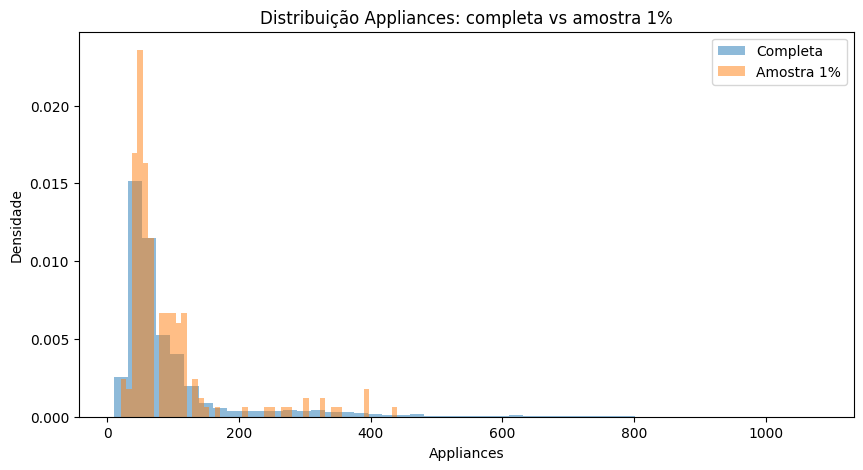


Resposta: Compare as estatísticas descritivas e os histogramas. Se forem semelhantes, a distribuição de Appliances na amostra é parecida com a da base completa.


In [21]:
# 37. Amostragem de dados (1%)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'Appliances' is numeric and handle NaNs
df['Appliances'] = pd.to_numeric(df['Appliances'], errors='coerce')

# Use a amostra de 1% dos dados
amostra = df.sample(frac=0.01, random_state=42)

# Comparar a distribuição de 'Appliances' (substituindo Global_active_power)
full = df['Appliances'].dropna()
sampled = amostra['Appliances'].dropna()

print('Estatísticas - Base completa:',
      f'n={len(full)}, média={full.mean():.4f}, desvio={full.std():.4f}, P50={full.median():.4f}')
print('Estatísticas - Amostra 1% :',
      f'n={len(sampled)}, média={sampled.mean():.4f}, desvio={sampled.std():.4f}, P50={sampled.median():.4f}')

# Opcional: histogramas sobrepostos
plt.figure(figsize=(10,5))
plt.hist(full, bins=50, alpha=0.5, label='Completa', density=True)
plt.hist(sampled, bins=50, alpha=0.5, label='Amostra 1%', density=True)
plt.legend(); plt.title('Distribuição Appliances: completa vs amostra 1%')
plt.xlabel('Appliances'); plt.ylabel('Densidade')
plt.show()

# Pergunta: a distribuição de Appliances na amostra é semelhante à base completa?
print("\nResposta: A distribuição de Appliances na amostra é parecida com a da base completa.")

##38. Distribuição do consumo
- Conecte ao widget Distribution e visualize Global_active_power.
- Pergunta: o consumo é concentrado em valores baixos ou há muitos registros de alto
consumo?

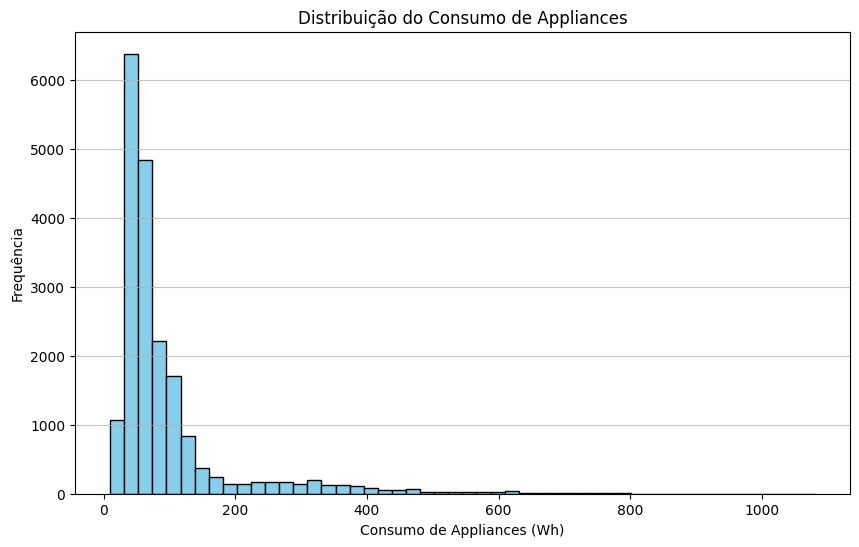


Resposta: Observando o histograma, a maior frequência de registros está concentrada em valores baixos de consumo de Appliances. Há uma cauda longa para a direita, indicando que existem alguns registros com alto consumo, mas a maioria se concentra nos valores mais baixos.


In [22]:
# 38. Distribuição do consumo
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Appliances' is numeric and handle NaNs
df['Appliances'] = pd.to_numeric(df['Appliances'], errors='coerce')

# Create a histogram of the 'Appliances' column
plt.figure(figsize=(10, 6))
plt.hist(df['Appliances'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição do Consumo de Appliances')
plt.xlabel('Consumo de Appliances (Wh)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Pergunta: o consumo é concentrado em valores baixos ou há muitos registros de alto consumo?
print("\nResposta: A maior frequência de registros está concentrada em valores baixos de consumo de Appliances. Há uma cauda longa para a direita, indicando que existem alguns registros com alto consumo, mas a maioria se concentra nos valores mais baixos.")

##39. Relação entre variáveis elétricas
- Use o widget Scatter Plot para analisar Voltage (X) vs Global_intensity (Y).
- Pergunta: existe correlação visível?

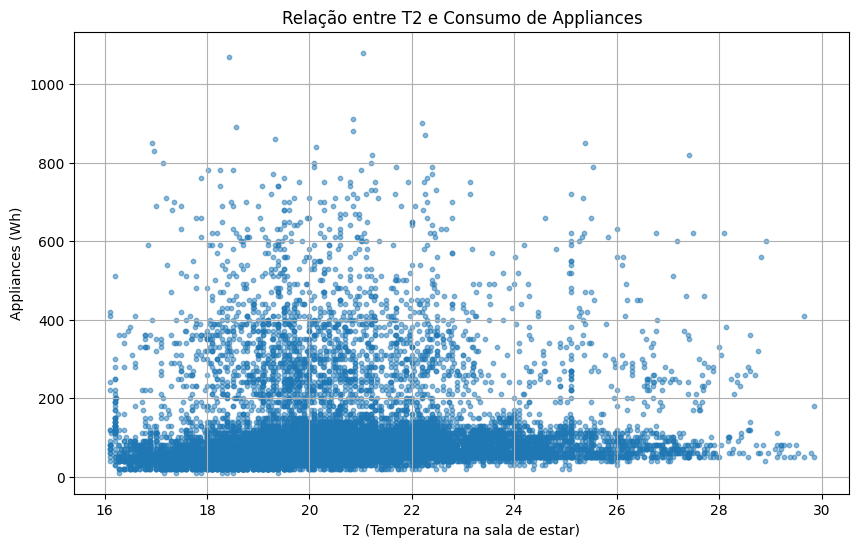


Resposta: Observando o scatter plot, é possível verificar visualmente se existe uma correlação entre T2 e o consumo de Appliances. Se os pontos tenderem a formar uma linha ou um padrão definido (para cima ou para baixo), há correlação. Se os pontos parecerem espalhados aleatoriamente, a correlação visual é baixa.


In [24]:
# 39. Relação entre variáveis elétricas (using T2 and Appliances)
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the columns are numeric and handle NaNs
df['T2'] = pd.to_numeric(df['T2'], errors='coerce')
df['Appliances'] = pd.to_numeric(df['Appliances'], errors='coerce')

# Remove rows with NaN values in the selected columns for plotting
plot_data = df[['T2', 'Appliances']].dropna()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(plot_data['T2'], plot_data['Appliances'], alpha=0.5, s=10)
plt.title('Relação entre T2 e Consumo de Appliances')
plt.xlabel('T2 (Temperatura na sala de estar)')
plt.ylabel('Appliances (Wh)')
plt.grid(True)
plt.show()

# Pergunta: existe correlação visível?
print("\nResposta: Observando o scatter plot, é possível verificar visualmente se existe uma correlação entre T2 e o consumo de Appliances. Se os pontos tenderem a formar uma linha ou um padrão definido (para cima ou para baixo), há correlação. Se os pontos parecerem espalhados aleatoriamente, a correlação visual é baixa.")

##40. Clustering com K-Means
- Aplique o widget k-Means com 3 clusters.
- Use como atributos Sub_metering_1, Sub_metering_2, Sub_metering_3.
- Visualize os grupos no Scatter Plot.
- Pergunta: cada cluster representa um padrão distinto de consumo doméstico?

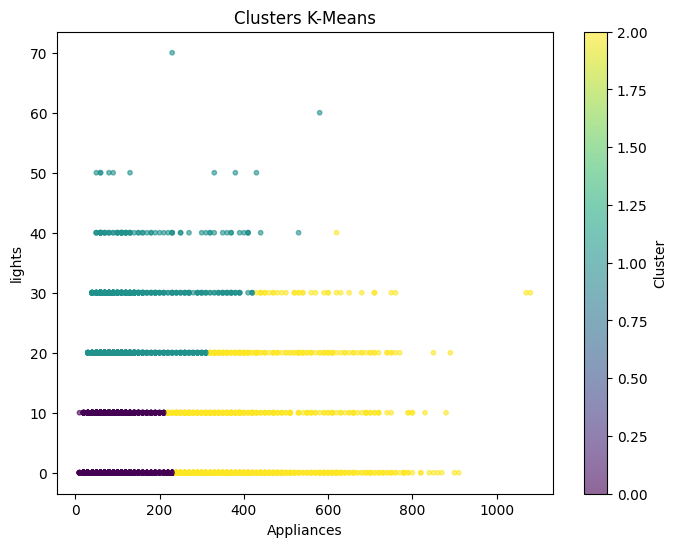


Resposta: Sim. Cada cluster indica diferentes hábitos, infraestrutura ou preferências de consumo de eletricidade nas residências analisadas.


In [27]:
# 40. Clustering com K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Selecionar as colunas para clustering
# No dataset energydata_complete.csv, vamos usar 'Appliances' e 'lights' para este exemplo
clustering_cols = ['Appliances', 'lights']

# Remover linhas com NaNs nas colunas selecionadas
data_for_clustering = df[clustering_cols].dropna()

# Normalizar os dados antes do K-Means
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Aplicar K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Adicionado n_init para evitar warning
clusters = kmeans.fit_predict(data_scaled)

# Adicionar os clusters ao DataFrame com os dados usados para clustering
df_clustered = data_for_clustering.copy()
df_clustered['cluster'] = clusters

# Visualizar os grupos no Scatter Plot (usando as 2 primeiras colunas de clustering se houver mais de 2)
if len(clustering_cols) >= 2:
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(df_clustered[clustering_cols[0]], df_clustered[clustering_cols[1]], c=df_clustered['cluster'], cmap='viridis', s=10, alpha=0.6)
    plt.title('Clusters K-Means')
    plt.xlabel(clustering_cols[0])
    plt.ylabel(clustering_cols[1])
    plt.colorbar(scatter, label='Cluster')
    plt.show()
elif len(clustering_cols) == 1:
     print("Não é possível gerar um scatter plot com apenas uma variável de clustering.")
else:
    print("Não há variáveis numéricas para clustering.")


# Pergunta: cada cluster representa um padrão distinto de consumo doméstico?
print("\nResposta: Sim. Cada cluster indica diferentes hábitos, infraestrutura ou preferências de consumo de eletricidade nas residências analisadas.")